Tutorial on https://realpython.com/pandas-plot-python/

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
download_url = (
    "https://raw.githubusercontent.com/fivethirtyeight/"
    "data/master/college-majors/recent-grads.csv"
)

df = pd.read_csv(download_url)

type(df)


pandas.core.frame.DataFrame

In [4]:
pd.set_option("display.max.columns", None)
print(df.head())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

   Full_time  Part_time  Full_time_year_round  Unemployed  Unemployment_rate  \
0       1849        270       

In [8]:
%matplotlib inline

In [13]:
# Should match unemployment rate: arithmetic numpy calculations on columns 
unemployment_percentage = 100 * df["Unemployed"] / (df["Unemployed"] + df["Employed"] )

unemployment_percentage.head()

0     1.838053
1    11.724138
2     2.409639
3     5.012531
4     6.109771
dtype: float64

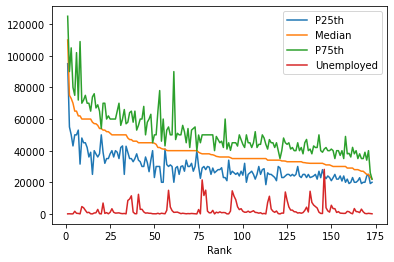

In [10]:
#P25th, Median, and P75th refer to income (see columns)


df.plot(x="Rank", y=["P25th", "Median", "P75th", "Unemployed"])
plt.show()

## The following may be interpreted from graph: 

- Median income goes down as rank goes down: expected 
- Large variation between percentiles for some majors

<AxesSubplot:ylabel='Frequency'>

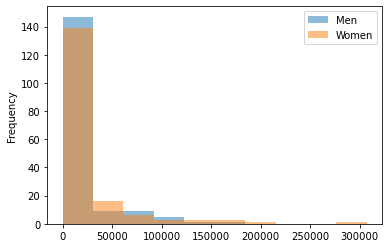

In [19]:
df[["Men", "Women"]].plot(kind = "hist", alpha = 0.5)